# Prédiction de désabonnement des clients d’une entreprise (Customers Churn Prediction)






## Problèmatique et enjeu
- La perte de clientèle, également appelée attrition de la clientèle, se produit lorsque des clients cessent de faire affaire avec une entreprise. 
- Les entreprises sont intéressées par l'identification de segments de ces clients car le prix d'acquisition d'un nouveau client est généralement plus élevé que celui de la rétention de l'ancien. 
- Connaître un segment de clients à risque de désabonnement, permettrait à une entreprise d'engager de manière proactive des offres spéciales pour fidéliser ce segment et éviter de les perdre. 



## Objectif :
- Il s'agira de créer un modèle simple de prédiction du taux de désabonnement des clients d'une compagnie bancaire. 
- Nous utiliserons deux algorithmes simples  de classification modéliser les clients désabonnés, 
- Evaluation du modèle de prédiction

## Libraries à utilisées
- Pandas et Numpy pour l'analyse et traitement des données et les calaculs scientifiques respectivement.
-Seaborn et Matplotlib pour la visualisation
- Plusieurs fonctions de la librairie Ipywidgets pour des graphiques interactif
- différentes fonctions de la librairie sklearn pour: 
 - la normalisation des données
 - diviser les données en ensembles train,validation et test.
 - réechantillonnage des données
 - modéliser les données
 - selectionner des variables
 - Chercher les meilleurs paramètres
 -etc


In [50]:
# Importation des librairies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import ipywidgets as wget
from ipywidgets import interact, interactive,fixed,interact_manual
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import FeatureUnion, Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# Présentation et importation des données
- Les donnnées utilisées sont celles d'une compagnie de telécommunication récupérées sur kaggle.
- Chaque ligne représente un client, chaque colonne contient les attributs du client décrits dans la colonne Métadonnées.
- Les données brutes contiennent 7043 lignes (clients) et 21 colonnes (caractéristiques).

- L'ensemble de données comprend des informations sur :

 - Les clients qui sont partis au cours du dernier mois - la colonne est appelée Churn. C'est notre cible.
 - Les services auxquels chaque client s'est abonné : téléphone, lignes multiples, Internet, sécurité en ligne, sauvegarde en ligne, protection des appareils, assistance technique, et streaming TV et films.
 - Informations sur le compte du client - depuis combien de temps il est client, contrat, mode de paiement, facturation électronique, frais mensuels et total des frais.
 - Informations démographiques sur les clients - sexe, tranche d'âge, et s'ils ont des partenaires et des personnes à charge.


In [2]:
# Importation des données
churn_data = pd.read_csv('Telco-Customer-Churn.csv')
print(f"les données brutes ont effectivement {churn_data.shape[0]} lignes et {churn_data.shape[1]} variables")

les données brutes ont effectivement 7043 lignes et 21 variables


# Analyse Exploratoire des données
Nous allons ici scruter les données afin de mieux les comprendre. Ceci à travers : 
 - Une analyse générale.
 - Une analyse des distributions.






## 1. Analyse générale


In [3]:
#affichage partiel des données
churn_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


La variable cible,  ***Churn***  prend deux valeurs : *Yes* (le client s'est désabonné) et *No* (le client ne s'est pas désabonné).

In [4]:
# informations les variables
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


- Il y'a deux types de variables dans l'ensemble de données : catégorielles (deux valeurs ou plus et sans ordre) et numériques. 
- Il y'a apriori pas de données manquantes. La vérification suit en dessous.
- La plupart des noms des variables("features") sont explicites, à l'exception de :
 - **Partner** : si le client a un partenaire ou non (Oui, Non),
 - **Dependents** : si le client a des personnes à charge ou non (Oui, Non),
 - **OnlineBackup** : si le client a une sauvegarde en ligne ou non (Oui, Non, Pas de service internet),
 - **tenure** : nombre de mois pendant lesquels le client est resté dans l'entreprise,
 - **MonthlyCharges** : le montant facturé au client chaque mois,
 - **TotalCharges** : le montant total facturé au client.
Il y a 7032 clients dans l'ensemble de données et 19 caractéristiques sans customerID (non informatif) et colonne Churn (variable cible). 
- La variable **TotalCharges** qui est numérique comme on le voit dans le tableau du dessus, est enregistrée dans les données comme une variable de type "objet". Il va falloir la transformer en type "float".

In [5]:
# Valeurs manquantes
churn_data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

- Aucune valeurs manquantes
- Une revérification sera faite après le traitement de la variable **TotalCharges**.

In [6]:
# Décomptes des valeurs unique par variables
churn_data.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

- La plupart des variables catégorielles ont 4 valeurs uniques ou moins.

In [7]:
# Vérification des données dupliquées
print(f"il y'a {churn_data.duplicated().sum()} données dupliquées.")

il y'a 0 données dupliquées.


## 2. Analyse des distributions
- Nous combinons les variables en deux listes(Catégorielles et numériques) afin de pouvoir les analyser conjointement.
- Nous étudions les distributions des variables numériques et catégorielles pour vérifier l'absence de valeurs aberrantes 
- et comparons les distributions des caractéristiques avec la variable cible.

### 2.1. Analyse des variables numériques
- Usage des techniques de résumé numérique (moyenne, écart-type, etc.). 
- Usage des histogrammes.

In [8]:
# Transformation de la variable "TotalCharges" en float
numerical_features = ["tenure", "MonthlyCharges", "TotalCharges"]
churn_data['TotalCharges'] = churn_data['TotalCharges'].replace(' ', np.nan).astype(float)

#### 2.1.1 Analyse univariée

In [9]:
# Fonction de boxplot interactive
def box_plot(b):
  sns.boxplot(y = churn_data[b])
  plt.title('Boxplot of ' + str(b))
  return plt.show()

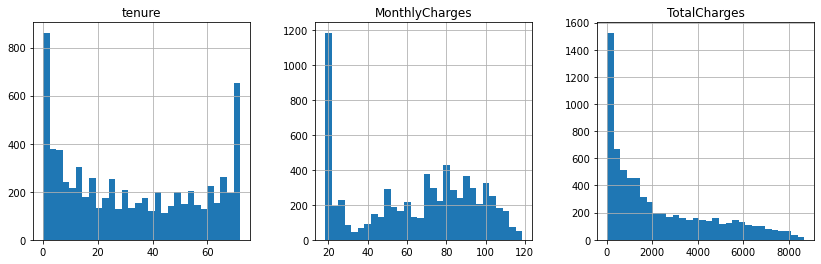

In [10]:
# Histogrammes
fig, ax = plt.subplots(1, 3, figsize=(14, 4))
churn_data[numerical_features].hist(bins=30, ax=ax)
plt.show()

In [11]:
# Boites à moustaches interavtives
interact(box_plot, b = numerical_features);

interactive(children=(Dropdown(description='b', options=('tenure', 'MonthlyCharges', 'TotalCharges'), value='t…

- À première vue, il n'y a pas de valeurs aberrantes dans les données. Aucun point de données n'est déconnecté de la distribution ou trop éloigné de la valeur moyenne. 
- Pour le confirmer, nous devrions calculer [l'écart interquartile (IQR)] (https://www.purplemath.com/modules/boxwhisk3.htm) et montrer que les valeurs de chaque élément numérique se situent dans la fourchette de 1,5 IQR entre le premier et le troisième quartile.
- Bien que ne présentant pas de valeurs aberrantes (*outliers*), Ces variables sont très asymétriques ce qui pourrait causer des erreurs au niveau des modèles que nous allons construire.

*Pistes d'amélioration(features engineering)*:

- Nous pouvons appliquer des fonctions de transformation à ces variables afin de les rendre moins asymétrique. 
- Nous pourrions convertir les valeurs numériques en intervalles ordinaux. Par exemple, l'ancienneté(**tenure**) est numérique, mais souvent nous ne nous soucions pas des petites différences numériques et nous regroupons plutôt l'ancienneté en clients à court, moyen et long terme. L'une des raisons de cette conversion serait de réduire le bruit, car souvent les petites fluctuations ne sont que du bruit.

### 2.1.2 Analyse multivariée
Nous examinons ici les distributions des caractéristiques numériques par rapport à la variable cible.

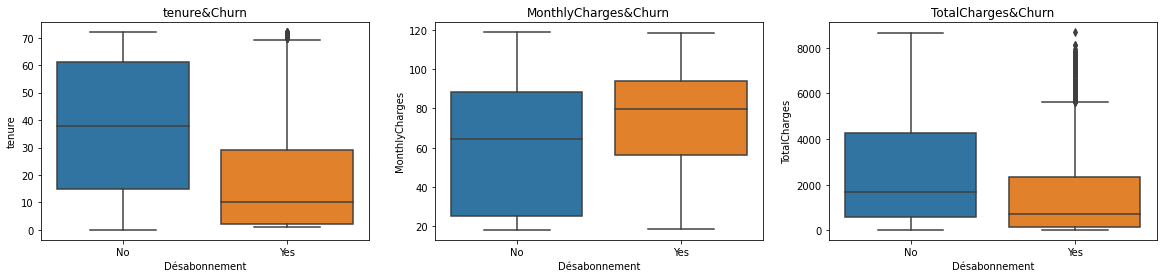

In [12]:
# Relations entre variables numériques et variables cible
tittle =["tenure&Churn", "MonthlyCharges&Churn", "TotalCharges&Churn"]
plt.figure(figsize=(20,4))
for i in range(len(numerical_features)):
  plt.subplot(1,3,i+1)
  sns.boxplot(x='Churn', y=numerical_features[i], data=churn_data)
  plt.xlabel('Désabonnement')
  plt.ylabel(numerical_features[i])
  plt.title(tittle[i])

plt.show()

- Nous pouvons observer que plus la charge totale facturée ( TotalCharges) et l'ancienneté (tenure) sont élevées, moins élevés sont les désabonnements.
-  les clients qui se sont désabonnés sont plus facturés mensuellement (MonthlyCharges) que les clients qui se se sont pas désabonnés. Cette information est très importante pour l'entreprise car le montant facturé mensuellement peut être un facteur important qui détermine si un client va se désabonner ou non.

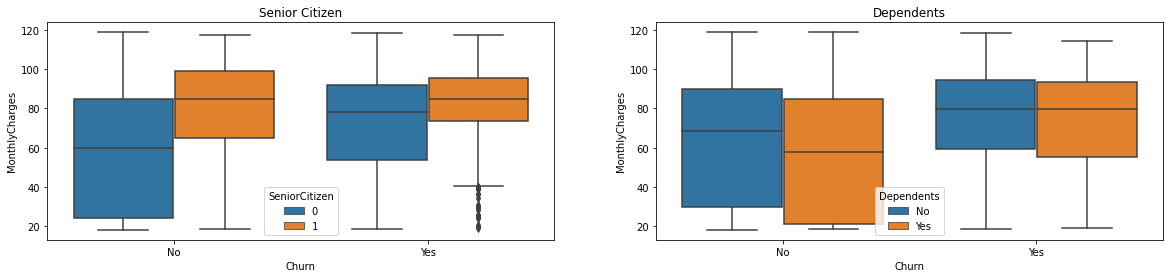

In [13]:
# Relation entre "MonthlyCharges" et "churn" selon chacune des variables "Dependents","SeniorCitizen"
plt.figure(figsize=(20,4))
plt.subplot(1,2,1)
sns.boxplot(x = 'Churn', y = 'MonthlyCharges', data=churn_data, hue = 'SeniorCitizen');
plt.title("Senior Citizen")
plt.subplot(1,2,2)
sns.boxplot(x = 'Churn', y = 'MonthlyCharges', data=churn_data, hue = 'Dependents')
plt.title("Dependents")
plt.show()

- Il semble que les personnes âgées soient beaucoup plus facturées mensuellement que les jeunes. Malgré cela, ils restent plus fidèles à l'entreprise que les jeunes.
- Le clients avec des persones à leur charges sont moins facturés mensuellement que ceux qui n'en ont pas. Le fait d'avoir des personnes à sa charge n'influence par Les désabonnement. 

In [14]:
# Résumé des données
churn_data[numerical_features].describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2266.771362
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3794.737500
max,72.000000,118.750000,8684.800000


- Les trois variables quantitatives (***tenure***, ***MonthlyCharges***, et ***TotalCharges***) ont différentes échelles. 
- ***tenure*** varie entre 0 et 72 tandis que ***MonthlyCharges*** varie entre 18.25 et 118.75 et ***TotalCharges*** varie entre 18.8 et 8684.8. 
- De nombreux modèles de Machine et de Deep Learning fonctionnent mieux avec des variables standardisées ou normalisées. 


## 2.2 Analyse des variables catégorielles

### 2.2.1 Analyse univariée
Nous regardons les proportions des catégories dans les variables

In [15]:
# Variables catégorielles
categorical_features = churn_data.nunique()[churn_data.nunique() < 5].keys().to_list()[:-1]
target = 'Churn'
categorical_features

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [16]:
# Fonction de construction de graphiques circulaires interactifs
def pie_plot(a):
  plt.figure(figsize=(20,4))
  churn_data[a].value_counts(normalize = True).plot(kind = 'pie',autopct='%1.1f%%')
  plt.ylabel('proportion')
  plt.title('Distribution of ' + str(a))
  return plt.show()

In [17]:
#pieplot interactif
print("cliquez dans la barre pour selectionner la variable à analyser.")
interact(pie_plot, a = categorical_features+[target]);

cliquez dans la barre pour selectionner la variable à analyser.


interactive(children=(Dropdown(description='a', options=('gender', 'SeniorCitizen', 'Partner', 'Dependents', '…

- Il y a plus de clients qui ne se sont pas désabonnés (73.5%) que de clients qui se sont désabonné (26.5%). Donc nous avons un problème de déséquilibre qu'il faudra absolument résoudre car cela peut impacter négativement la performance des modèles de classification que nous allons construire.
- la distribution des données entre les différents sexes est à peu près également répartie.
- Le nombre de clients qui sont des personnes âgées (16.2%) est bien inférieur à celui des clients jeunes (83.8%).

- La variable Partner indique si le client a un partenaire (Yes) ou pas (No). Les deux catégories ont pratiquement la même proportion.

# Preprocessing
- Traitement des valeurs manquantes
- Encodage des variables catégorielles
- Traitement de l'asymétrie
- reéchantillonnage

## 1.Traitement des valeurs manquantes
Le pourcentage de valeurs manquantes étant négligeable, on peut simplement les supprimer.

In [18]:
# suppression des valeurs manquantes
print(f"Il y'a {round(churn_data.isna().sum()['TotalCharges']/churn_data.shape[0],4)*100}% de valeurs manquantes.")
churn = churn_data.copy()
churn.dropna(inplace=True)

Il y'a 0.16% de valeurs manquantes.


# 2.Encodage des variables Catégorielles
- Pour préparer l'ensemble de données à la modélisation du taux de désabonnement, nous devons encoder les variables catégorielles en nombres. 
- Cela signifie coder "Oui", "Non" en 0 et 1 afin que l'algorithme puisse travailler avec les données. 
- Ce processus est appelé [Label encoding](https://www.mygreatlearning.com/blog/label-encoding-in-python/).

In [19]:
categorical_feature_names = []
label_encoders = {}
for categorical in categorical_features+[target]:
  label_encoders[categorical] = LabelEncoder()
  churn[categorical] = label_encoders[categorical].fit_transform(churn[categorical])
  names = label_encoders[categorical].classes_.tolist()
  print('Label encoder %s - values: %s' % (categorical, names))

Label encoder gender - values: ['Female', 'Male']
Label encoder SeniorCitizen - values: [0, 1]
Label encoder Partner - values: ['No', 'Yes']
Label encoder Dependents - values: ['No', 'Yes']
Label encoder PhoneService - values: ['No', 'Yes']
Label encoder MultipleLines - values: ['No', 'No phone service', 'Yes']
Label encoder InternetService - values: ['DSL', 'Fiber optic', 'No']
Label encoder OnlineSecurity - values: ['No', 'No internet service', 'Yes']
Label encoder OnlineBackup - values: ['No', 'No internet service', 'Yes']
Label encoder DeviceProtection - values: ['No', 'No internet service', 'Yes']
Label encoder TechSupport - values: ['No', 'No internet service', 'Yes']
Label encoder StreamingTV - values: ['No', 'No internet service', 'Yes']
Label encoder StreamingMovies - values: ['No', 'No internet service', 'Yes']
Label encoder Contract - values: ['Month-to-month', 'One year', 'Two year']
Label encoder PaperlessBilling - values: ['No', 'Yes']
Label encoder PaymentMethod - values

In [20]:
churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,3668-QPYBK,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


# 3.Traitement de l'asymetrie
Nous avons vu que la variable ***TotalCharges*** est très asymétrique alors transformons-la par une fonction racine carrée.

In [21]:
# Transformation de la variable 'TotalCharges' 
churn['TotalCharges'] = np.sqrt(churn['TotalCharges'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


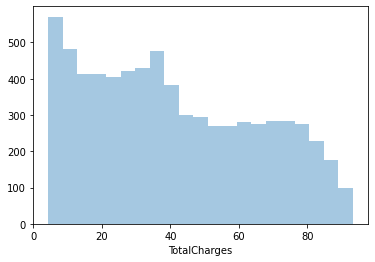

In [22]:
# Histogramme de la variable transformée
sns.distplot(churn['TotalCharges'], kde=False);
plt.show()

## 4. rééchantillonnage 
- Il s'agit de traiter le problème de déséquilibre de classe dans les données.

- orsqu'il y a une très grande différence entre le nombre d'observations dans chaque catégorie de la variable cible à prédire, cela peut entraîner des erreurs de modélisation.

- Dans le cas d'espèce, il y a 73,5% de personnes qui n'ont pas résilié leur abonnement contre 26,5% qui l'ont fait. 
- Il y a donc un grand déséquilibre de classe. 
- Nous pouvons utiliser le rééchantillonnage pour créer plus d'équilibre entre les catégories de la variable cible. Soit on crée plus d'observations dans la classe minoritaire (modalité 1) c'est-à-dire on fait un sur-échantillonnage, soit on diminue les observations de la classe majoritaire (modalité 0) c'est-à-dire un sous-échantillonnage.
- Nous nous limiterons ici au sur échantillonnage.
- Nous allons rééchantillonner juste les données d'entraînement.


In [23]:
# Données d'entraînement (60%), de validation (20%) et de test (20%)
seed = 1111
X_train, X_test = train_test_split(churn, test_size = 0.4, random_state = seed)
X_val, X_test = train_test_split(X_test, test_size = 0.5, random_state = seed)

In [24]:
# Résolution du problème de déséquilibre de classe : Méthode de sur-échantillonnage de la classe minoritaire
minority = X_train[X_train.Churn == 1]
majority = X_train[X_train.Churn == 0]
minority_upsampled = resample(minority, replace = True, n_samples = len(majority), random_state=seed)
upsampled = pd.concat([majority, minority_upsampled])
upsampled

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4877,4973-RLZVI,0,0,0,0,30,1,0,0,2,2,2,2,2,0,1,0,1,74.65,48.047893,0
3794,4280-DLSHD,1,0,1,0,8,1,0,0,0,2,2,0,0,0,0,1,3,54.75,21.115160,0
1476,5067-DGXLL,1,0,0,0,2,1,0,2,1,1,1,1,1,1,0,0,3,20.25,6.066300,0
1212,4291-SHSBH,1,0,0,0,7,1,0,1,0,0,0,0,0,0,0,1,2,69.55,22.833090,0
759,5684-FJVYR,0,0,1,1,72,1,2,1,2,2,0,2,0,0,2,1,0,90.35,81.014813,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3975,2860-RANUS,0,1,0,0,20,1,2,1,0,0,0,0,0,2,0,1,1,85.80,41.563205,1
1742,5318-IXUZF,0,0,0,0,2,1,0,1,0,2,0,0,2,0,0,1,0,87.15,13.555442,1
4254,2683-BPJSO,1,0,1,0,29,1,2,1,2,2,0,0,0,0,0,1,2,84.45,49.669910,1
1086,8999-BOHSE,0,1,0,0,11,1,0,1,0,0,0,0,2,2,0,0,0,89.70,32.368194,1


In [25]:
# Vérification
upsampled['Churn'].value_counts(normalize = True)

1    0.5
0    0.5
Name: Churn, dtype: float64

In [26]:
# Données d'entraînement sur la base la méthode de sur-échantillonnage de la classe minoritaire
churn_train= upsampled


# Modélisation
- Nous utilisons sklearn, une bibliothèque d'apprentissage automatique en Python, pour créer un classificateur. 
- La méthode de sklearn consiste à utiliser des pipelines qui définissent le traitement des caractéristiques et le classificateur.
- Dans notre exemple, le pipeline prend un ensemble de données en entrée, il pré-traite les caractéristiques  
- puis il entraîne un classificateur (LogisticRegression,tree.DecisionTreeClassifier), sur les caractéristiques apprises. 
- Une fois formé, il prend la même entrée et renvoie des prédictions en sortie.

- Dans le pipeline, nous traitons séparément les caractéristiques catégorielles et numériques. 
- Nous codons en une seule fois les caractéristiques catégorielles et mettons à l'échelle les caractéristiques numériques en appliquant la fonction **MinMaxScaler()**.


In [27]:
class ItemSelector(BaseEstimator, TransformerMixin):
    def __init__(self, key):
        self.key = key

    def fit(self, x, y=None):
        return self

    def transform(self, df):
        return df[self.key]

# 1.Modèle de regression logistique

In [28]:
# Dictionnaire des hyperparamètres
params = {'logistic__C':[0.001, 0.01, 1, 10, 50, 100, 500]}
# GridSearchCV
classifier = Pipeline(
    [
        (
            "union",
            FeatureUnion(
                transformer_list=[
                    (
                        "categorical_features",
                        Pipeline(
                            [
                                ("selector", ItemSelector(key=categorical_features)),
                                ("onehot", OneHotEncoder()),
                            ]
                        ),
                    )
                ]
                + [
                    (
                        "numerical_features",
                        Pipeline(
                            [
                                ("selector", ItemSelector(key=numerical_features)),
                                ("scalar", MinMaxScaler()),
                            ]
                        ),
                    )
                ]
            ),
        ),
        ("logistic", LogisticRegression(random_state=seed, max_iter=500)),
    ]
)
grid_logreg = GridSearchCV(estimator= classifier, param_grid=params,scoring='f1',cv=5)

# Entraînement de l'algorithme
logreg_model = grid_logreg.fit(churn_train, churn_train[target])

# Meilleur score et meilleur hyperparamètre

print(round(logreg_model.best_score_, 3))

print(logreg_model.best_estimator_)

0.772
Pipeline(memory=None,
         steps=[('union',
                 FeatureUnion(n_jobs=None,
                              transformer_list=[('categorical_features',
                                                 Pipeline(memory=None,
                                                          steps=[('selector',
                                                                  ItemSelector(key=['gender',
                                                                                    'SeniorCitizen',
                                                                                    'Partner',
                                                                                    'Dependents',
                                                                                    'PhoneService',
                                                                                    'MultipleLines',
                                                                                    'Interne

Le modèle a un bon score d'entraînement. Evaluons sa performance sur les données de validation afin d'apprécier sa capacité à généraliser sur de nouvelles données.

## Evaluation
Avec classification_report nous calculons la précision et le recall avec les valeurs réelles et prédites. 
- Lorsqu'il y a un problème de déséquilibre de classe, la précision globale(accuracy) n'est pas une bonne métrique d'évaluation de la performance du modèle.
- precision et recall sont des métriques très utilisées surtout lorsque les classes de la variable cible sont très déséquilibrées.
- L'amélioration de precision diminue le recall et vice-versa. Alors que faire ?
- Fort heureusement, il y a une métrique qui contient à la fois la sensibilité et la spécificité. C'est le F1 score.
- Pour un modèle parfait, f1 score est égal à 1 et la plus mauvaise performance est un modèle avec un f1 score égal à O.
- Nous choississons le F1 score pour évaluer la performance de chaque modèle qui sera construit.


In [29]:
# Evaluation
pred = logreg_model.best_estimator_.predict(X_val)
print(classification_report(X_val[target], pred))

              precision    recall  f1-score   support

           0       0.90      0.76      0.82      1018
           1       0.55      0.77      0.64       388

    accuracy                           0.76      1406
   macro avg       0.72      0.76      0.73      1406
weighted avg       0.80      0.76      0.77      1406



- Pour la classe 1 (utilisateurs désabonnés), le modèle obtient 0,55 de précision et 0,77 de recall. 
- La précision nous indique le nombre d'utilisateurs désabonnés que notre classifieur a correctement prédit. 
- D'autre part, le recall nous indique combien d'utilisateurs désabonnés il a manqué. En termes simples, le classificateur n'est pas très précis pour les utilisateurs désabonnés.

# Modèle Decision Tree Classifier

In [38]:
# Dictionnaire des hyperparamètres
params2 = {'DecisionTree__max_depth':[None,1,2],
          'DecisionTree__min_samples_split':[2,3,4,5],
          'DecisionTree__min_samples_leaf':[1,2,3]}        
# GridSearchCV
pipeline = Pipeline(
    [
        (
            "union",
            FeatureUnion(
                transformer_list=[
                    (
                        "categorical_features",
                        Pipeline(
                            [
                                ("selector", ItemSelector(key=categorical_features)),
                                ("onehot", OneHotEncoder()),
                            ]
                        ),
                    )
                ]
                + [
                    (
                        "numerical_features",
                        Pipeline(
                            [
                                ("selector", ItemSelector(key=numerical_features)),
                                ("scalar", MinMaxScaler()),
                            ]
                        ),
                    )
                ]
            ),
        ),
              ("DecisionTree", tree.DecisionTreeClassifier(random_state=42))
    ]
)

In [39]:
Decision_tree = GridSearchCV(estimator= pipeline, param_grid=params2,scoring='f1',cv=5)

# Entraînement de l'algorithme
Decision_tree_model = Decision_tree.fit(churn_train, churn_train[target])

# Meilleur score et meilleur hyperparamètre

print(round(Decision_tree_model.best_score_, 3))

print(Decision_tree_model.best_estimator_)

0.88
Pipeline(memory=None,
         steps=[('union',
                 FeatureUnion(n_jobs=None,
                              transformer_list=[('categorical_features',
                                                 Pipeline(memory=None,
                                                          steps=[('selector',
                                                                  ItemSelector(key=['gender',
                                                                                    'SeniorCitizen',
                                                                                    'Partner',
                                                                                    'Dependents',
                                                                                    'PhoneService',
                                                                                    'MultipleLines',
                                                                                    'Internet

In [41]:
# Evaluation
pred2 = Decision_tree_model.best_estimator_.predict(X_val)
print(classification_report(X_val[target], pred2))

              precision    recall  f1-score   support

           0       0.80      0.82      0.81      1018
           1       0.50      0.47      0.48       388

    accuracy                           0.72      1406
   macro avg       0.65      0.65      0.65      1406
weighted avg       0.72      0.72      0.72      1406



- La précision et le recall et le f1-score se détoriorent ici.
- Le model logistique reste le meilleur à ce stade.

In [46]:
# test
pred3 = logreg_model.best_estimator_.predict(X_test)
print(classification_report(X_test[target], pred3))

              precision    recall  f1-score   support

           0       0.92      0.76      0.83      1046
           1       0.53      0.80      0.64       361

    accuracy                           0.77      1407
   macro avg       0.73      0.78      0.74      1407
weighted avg       0.82      0.77      0.78      1407



In [49]:
# Les abonnés à fédéliser
ToFidelisize = pred3==1
X_test[ToFidelisize]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5173,2480-SQIOB,1,0,1,1,4,1,0,0,0,0,0,0,0,0,0,0,2,44.80,13.024976,0
3527,3746-EUBYR,1,0,1,0,1,1,2,1,0,0,0,0,0,0,0,1,0,74.60,8.637129,1
3664,6257-RJOHI,1,0,0,0,4,1,0,0,0,0,0,2,0,0,0,1,3,50.80,14.223220,0
2555,1849-RJYIG,0,0,0,0,8,1,0,0,2,0,0,0,2,0,0,1,2,60.00,22.085063,0
2634,6877-TJMBR,1,0,1,0,1,1,0,1,0,0,0,2,2,0,0,1,2,84.80,9.208692,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6169,4847-QNOKA,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,44.90,6.700746,1
3328,1640-PLFMP,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,2,70.25,8.381527,0
4327,0958-YHXGP,0,0,0,0,7,1,0,1,0,0,0,0,0,0,0,1,3,69.90,22.300224,0
2471,1323-OOEPC,0,0,1,0,53,1,2,1,0,2,0,0,2,2,0,1,1,98.40,71.760017,1


- Liste des abonnés qui sont susceptibles de se désabonnées et vers qui la compagnie devrait faire des publicités ciblées question de les fidéliser.